# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy import stats
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

626

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Setting Up URLs and units preference
url = "http://api.openweathermap.org/data/2.5/weather?"
units = 'imperial'


# Create empty lists to place information from API

lng = []
lat = []
city_name = []
temp_high = []
temp_low = []
humidity = []
cloudiness = []
wind_spd = []
country = []
date = []

# Set up counter
record = 1 

# Formatting 
print(f"Beginning Data Retrieval")
print(f"-------------------------------")

for city in cities:
   
    try:
        #Setting up URLs
        query_url = f'{url}appid={weather_api_key}&q={city}&units={units}'
        response = requests.get(query_url)
        response_json = response.json()
    
        # Pulling data from API and sorting them to the correct lists
        lng.append(response_json['coord']['lon'])
        lat.append(response_json['coord']['lat'])
        city_name.append(response_json['name'])
        date.append(response_json['dt'])
        country.append(response_json['sys']['country'])
        temp_high.append(response_json['main']['temp_max'])
        temp_low.append(response_json['main']['temp_min'])
        humidity.append(response_json['main']['humidity'])
        cloudiness.append(response_json['clouds']['all'])
        wind_spd.append(response_json['wind']['speed'])
    
        # Formatting variables for response
        city_response = response_json['name']
        print(f'Processing Record {record} | {city_response}')
    
        # Adding to the count
        record = record + 1
    
    except:
        # If there's an error, print this statement
        print(f'City not found. Skipping...')

    continue
print(f"-------------------------------")
print(f"Data Retrieval Complete")
print(f"-------------------------------")

Beginning Data Retrieval
-------------------------------
Processing Record 1 | Hilo
Processing Record 2 | Mar del Plata
Processing Record 3 | Chokurdakh
Processing Record 4 | Hastings
Processing Record 5 | Kapaa
Processing Record 6 | Carnarvon
Processing Record 7 | Hammerfest
Processing Record 8 | Albany
Processing Record 9 | Great Falls
Processing Record 10 | Punta Arenas
Processing Record 11 | Atchison
Processing Record 12 | Morondava
Processing Record 13 | Busselton
Processing Record 14 | San Jerónimo
Processing Record 15 | Bethel
City not found. Skipping...
Processing Record 16 | Atuona
Processing Record 17 | Prince Rupert
Processing Record 18 | Vardø
Processing Record 19 | Castro
Processing Record 20 | Butaritari
Processing Record 21 | San Cristobal
Processing Record 22 | Trzcianka
Processing Record 23 | Aksha
Processing Record 24 | Esperance
City not found. Skipping...
Processing Record 25 | Brownsville
Processing Record 26 | Dhārchula
Processing Record 27 | Hong Kong
Processing 

Processing Record 228 | Rafsanjān
Processing Record 229 | Ulladulla
Processing Record 230 | Belen
Processing Record 231 | Iquique
Processing Record 232 | Nome
Processing Record 233 | Vila Velha
Processing Record 234 | Port Elizabeth
Processing Record 235 | Dunedin
Processing Record 236 | Severo-Kuril'sk
Processing Record 237 | Chai Badan
Processing Record 238 | Nizhniy Kuranakh
Processing Record 239 | Mugumu
Processing Record 240 | Esim
Processing Record 241 | Moree
Processing Record 242 | São Francisco de Paula
Processing Record 243 | Vestmanna
Processing Record 244 | Banjar
Processing Record 245 | Saint-Augustin
Processing Record 246 | Vao
Processing Record 247 | Copiapó
City not found. Skipping...
Processing Record 248 | Riyadh
Processing Record 249 | Guangyuan
Processing Record 250 | Pangnirtung
Processing Record 251 | Ozinki
Processing Record 252 | Souillac
Processing Record 253 | Swansea
Processing Record 254 | Nadym
Processing Record 255 | Santa Cruz
Processing Record 256 | Shen

Processing Record 459 | Jimma
Processing Record 460 | Bouna
Processing Record 461 | Karasjok
Processing Record 462 | Kudahuvadhoo
Processing Record 463 | San Joaquin
Processing Record 464 | Raudeberg
Processing Record 465 | Kālāvad
City not found. Skipping...
Processing Record 466 | Yenagoa
Processing Record 467 | Kaitangata
Processing Record 468 | St. George's
Processing Record 469 | Santa Teresa del Tuy
Processing Record 470 | Lipari
Processing Record 471 | Jining
Processing Record 472 | Haines Junction
Processing Record 473 | Erzin
Processing Record 474 | Halifax
Processing Record 475 | San Nicolas
Processing Record 476 | Sturgis
Processing Record 477 | Gamba
Processing Record 478 | Baheri
Processing Record 479 | Manokwari
Processing Record 480 | Yangi Marg`ilon
Processing Record 481 | Tabatinga
Processing Record 482 | Jasper
Processing Record 483 | Kabanjahe
Processing Record 484 | Itoman
Processing Record 485 | Mastic Beach
Processing Record 486 | Saint Anthony
Processing Record 4

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# Creating a dictionary to store data
weather_dict = {
    "City": city_name,
    "Latitude": lat,
    "Longitude": lng,
    "Max Temp": temp_high,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_spd,
    "Country": country,
    "Date": date}

In [5]:
# Converting data to a data frame
weather_data = pd.DataFrame(weather_dict)

# Previewing the count on the cities
weather_data.count()

City          576
Latitude      576
Longitude     576
Max Temp      576
Humidity      576
Cloudiness    576
Wind Speed    576
Country       576
Date          576
dtype: int64

In [6]:
# Previewing the data frame
weather_data.head(5)

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hilo,19.73,-155.09,77.00,83,90,5.82,US,1599599145
1,Mar del Plata,-38.00,-57.56,55.40,82,75,14.99,AR,1599599452
2,Chokurdakh,70.63,147.92,41.88,87,100,8.88,RU,1599599281
3,Hastings,50.86,0.57,63.00,97,5,4.00,GB,1599599520
4,Kapaa,22.08,-159.32,84.20,66,40,14.99,US,1599599309


In [7]:
# Exporting data to csv

weather_data.to_csv (f'weather_data.csv', index = False, header=True)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
# Sorting the Humidity column to find if any are > 100% humidity--there are none. 
# * Never going to Honiara *

weather_data.sort_values(by='Humidity', ascending=False)

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
516,Skibbereen,51.55,-9.27,59.00,100,75,11.41,IE,1599599423
545,Kilrush,52.64,-9.48,62.60,100,75,11.41,IE,1599599697
183,Clyde River,70.47,-68.59,33.80,100,90,2.24,CA,1599599282
5,Carnarvon,-24.87,113.63,60.80,100,29,6.93,AU,1599599267
342,Naustdal,61.51,5.72,55.40,100,75,4.70,NO,1599599639
...,...,...,...,...,...,...,...,...,...
298,Alta Floresta,-9.88,-56.09,100.49,12,52,4.43,BR,1599599370
402,Camapuã,-19.53,-54.04,95.63,12,0,5.03,BR,1599599657
502,Laguna,38.42,-121.42,93.99,11,90,16.11,US,1599599348
464,Kālāvad,22.22,70.38,84.00,10,39,7.23,IN,1599599674


In [9]:
#  Get the indices of cities that have humidity over 100%.

# No cities have a humidity over 100%

In [10]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

# N/A

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

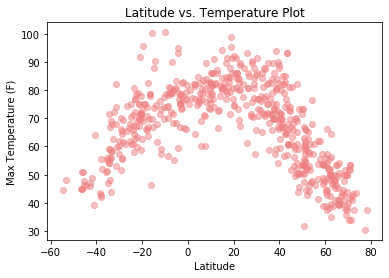

In [11]:
x_values = weather_data['Latitude']
y_values = weather_data['Max Temp']
plt.scatter(x_values,y_values, color="lightcoral", alpha=0.5)
plt.title('Latitude vs. Temperature Plot')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')

# Save a copy of the plot
plt.savefig("lat_vs_temp_plot.png")

plt.show()

## Latitude vs. Humidity Plot

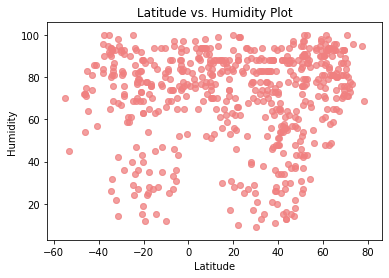

In [12]:
x_values = weather_data['Latitude']
y_values = weather_data['Humidity']
plt.scatter(x_values,y_values, color="lightcoral", alpha=0.5)
plt.scatter(x_values,y_values, color="lightcoral", alpha=0.5)
plt.title('Latitude vs. Humidity Plot')
plt.xlabel('Latitude')
plt.ylabel('Humidity')

# Save a copy of the plot
plt.savefig("lat_vs_hum_plot.png")

plt.show()

## Latitude vs. Cloudiness Plot

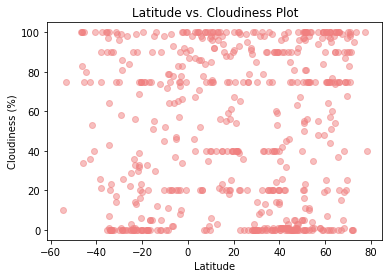

In [13]:
x_values = weather_data['Latitude']
y_values = weather_data['Cloudiness']
plt.scatter(x_values,y_values, color="lightcoral", alpha=0.5)
plt.title('Latitude vs. Cloudiness Plot')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

# Save a copy of the plot
plt.savefig("lat_vs_cloud_plot.png")

plt.show()

## Latitude vs. Wind Speed Plot

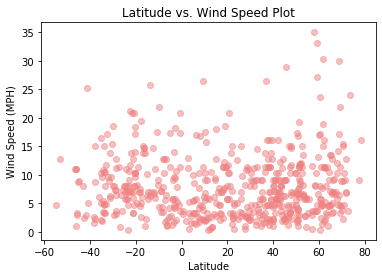

In [14]:
x_values = weather_data['Latitude']
y_values = weather_data['Wind Speed']
plt.scatter(x_values,y_values, color="lightcoral", alpha=0.5)
plt.title('Latitude vs. Wind Speed Plot')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (MPH)')

# Save a copy of the plot
plt.savefig("lat_vs_wind_plot.png")

plt.show()

## Linear Regression

In [15]:
# OPTIONAL: Create a function to create Linear Regression plots

In [16]:
# Create Northern and Southern Hemisphere DataFrames based on their latitude

north_hem_df = weather_data[weather_data['Latitude'] > 0]

south_hem_df = weather_data[weather_data['Latitude'] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.6325843605182068


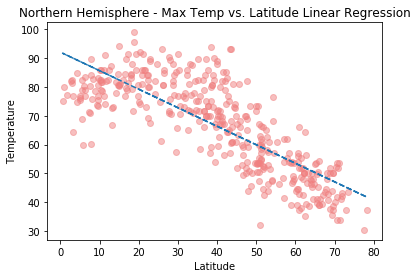

In [17]:
# Define the x and y values in the northern hemisphere
x_values = north_hem_df['Latitude']
y_values = north_hem_df['Max Temp']

# Calculating the pivitol stats
slope, intercept, rvalue, pvalue, stderr = stats.linregress(x_values, y_values)
fit = slope * x_values + intercept

# Build the plot
plt.scatter(x_values, y_values, color="lightcoral", alpha=0.5)
plt.plot(x_values,fit,"--")
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Temperature')
print(f"The r-squared is: {rvalue**2}")

# Save a copy of the plot
plt.savefig("nhem_lat_vs_temp_plot.png")

# Show plot
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.5024132687699766


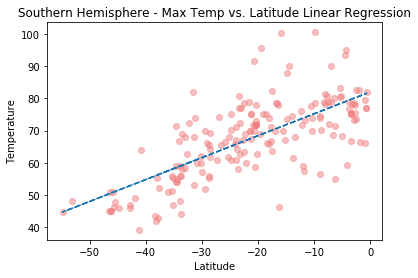

In [18]:
# Define the x and y values in the southern hemisphere
x_values = south_hem_df['Latitude']
y_values = south_hem_df['Max Temp']

# Calculating the pivitol stats
slope, intercept, rvalue, pvalue, stderr = stats.linregress(x_values, y_values)
fit = slope * x_values + intercept

# Build the plot
plt.scatter(x_values, y_values, color="lightcoral", alpha=0.5)
plt.plot(x_values,fit,"--")
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Temperature')
print(f"The r-squared is: {rvalue**2}")

# Save a copy of the plot
plt.savefig("shem_lat_vs_temp_plot.png")

# Show plot
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0009174419507078423


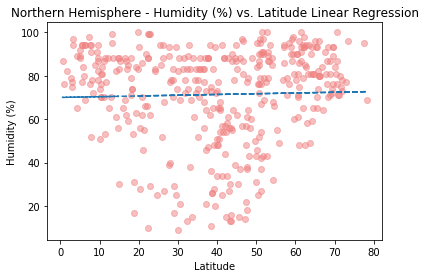

In [19]:
# Define the x and y values in the northern hemisphere
x_values = north_hem_df['Latitude']
y_values = north_hem_df['Humidity']

# Calculating the pivitol stats
slope, intercept, rvalue, pvalue, stderr = stats.linregress(x_values, y_values)
fit = slope * x_values + intercept

# Build the plot
plt.scatter(x_values, y_values, color="lightcoral", alpha=0.5)
plt.plot(x_values,fit,"--")
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
print(f"The r-squared is: {rvalue**2}")

# Save a copy of the plot
plt.savefig("nhem_lat_vs_hum_plot.png")

# Show plot
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.006156203397901275


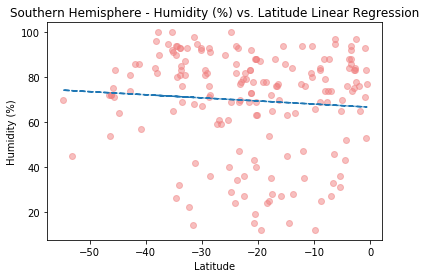

In [20]:
# Define the x and y values in the southern hemisphere
x_values = south_hem_df['Latitude']
y_values = south_hem_df['Humidity']

# Calculating the pivitol stats
slope, intercept, rvalue, pvalue, stderr = stats.linregress(x_values, y_values)
fit = slope * x_values + intercept

# Build the plot
plt.scatter(x_values, y_values, color="lightcoral", alpha=0.5)
plt.plot(x_values,fit,"--")
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
print(f"The r-squared is: {rvalue**2}")

# Save a copy of the plot
plt.savefig("shem_lat_vs_hum_plot.png")

# Show plot
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0004463637967797228


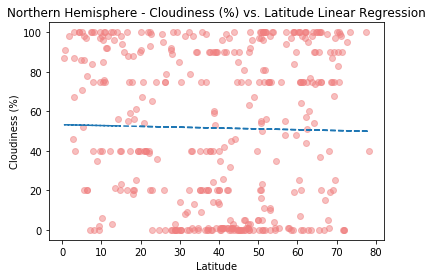

In [21]:
# Define the x and y values in the northern hemisphere
x_values = north_hem_df['Latitude']
y_values = north_hem_df['Cloudiness']

# Calculating the pivitol stats
slope, intercept, rvalue, pvalue, stderr = stats.linregress(x_values, y_values)
fit = slope * x_values + intercept

# Build the plot
plt.scatter(x_values, y_values, color="lightcoral", alpha=0.5)
plt.plot(x_values,fit,"--")
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
print(f"The r-squared is: {rvalue**2}")

# Save a copy of the plot
plt.savefig("nhem_lat_vs_cloud_plot.png")

# Show plot
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 1.2009412450717988e-05


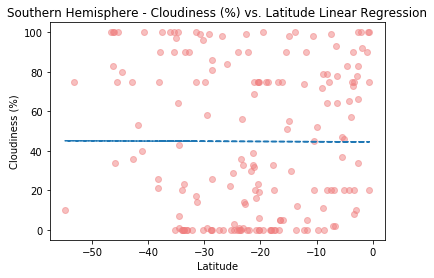

In [22]:
# Define the x and y values in the southern hemisphere
x_values = south_hem_df['Latitude']
y_values = south_hem_df['Cloudiness']

# Calculating the pivitol stats
slope, intercept, rvalue, pvalue, stderr = stats.linregress(x_values, y_values)
fit = slope * x_values + intercept

# Build the plot
plt.scatter(x_values, y_values, color="lightcoral", alpha=0.5)
plt.plot(x_values,fit,"--")
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
print(f"The r-squared is: {rvalue**2}")

# Save a copy of the plot
plt.savefig("shem_lat_vs_cloud_plot.png")

# Show plot
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.03368786120603326


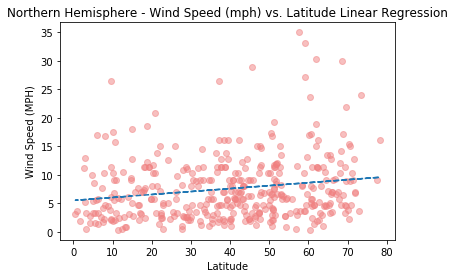

In [23]:
# Define the x and y values in the northern hemisphere
x_values = north_hem_df['Latitude']
y_values = north_hem_df['Wind Speed']

# Calculating the pivitol stats
slope, intercept, rvalue, pvalue, stderr = stats.linregress(x_values, y_values)
fit = slope * x_values + intercept

# Build the plot
plt.scatter(x_values, y_values, color="lightcoral", alpha=0.5)
plt.plot(x_values,fit,"--")
plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (MPH)')
print(f"The r-squared is: {rvalue**2}")

# Save a copy of the plot
plt.savefig("nhem_lat_vs_wind_plot.png")

# Show plot
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.0006698223012785987


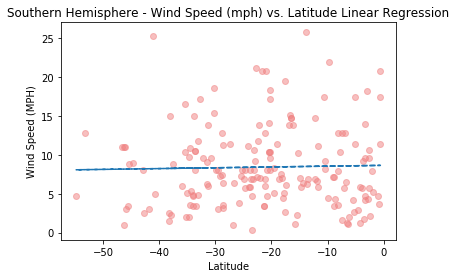

In [24]:
# Define the x and y values in the southern hemisphere
x_values = south_hem_df['Latitude']
y_values = south_hem_df['Wind Speed']

# Calculating the pivitol stats
slope, intercept, rvalue, pvalue, stderr = stats.linregress(x_values, y_values)
fit = slope * x_values + intercept

# Build the plot
plt.scatter(x_values, y_values, color="lightcoral", alpha=0.5)
plt.plot(x_values,fit,"--")
plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (MPH)')
print(f"The r-squared is: {rvalue**2}")

# Save a copy of the plot
plt.savefig("shem_lat_vs_wind_plot.png")

# Show plot
plt.show()